# EDA Project: Data Analysis for Marketing


## Introduction
A fast-food company came to us (Data Solutions company) to help them with opening their first branch in NY metropolitan area.  Their goal is to maximize their sales and reduce their operation cost. In order to achieve this target. We will need to know the best month of the year to open the branch based on the busyness and the amount of people in targeted stations. Additionally, we will try to locate the best location to open the branch.  Furthermore, we will analyze the given data to calculate the busiest months, days of the week and hours. This will help in planning the necessary offers by reducing them during rush days and hours.     

# 1.Data Gathering and Cleaning:
For this project, I will use a whole year of data becuase it is rquiered to caculate the busyiest month of the year. The the rent of the location and the opening of the branch is qoing to take place at the begning of this month. There are some nessary things that we need to take care of for the sake of effciancy and understanding:
- Dividing the data into 12 months. This will speed up the process.
    - It is requierd to use the latest data.  
- The busyness is calculated by the sum of ENTRIES and EXITS. 


First, we should importall the nessary libraries and keep them on the top. 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
%matplotlib inline 
import sqlite3
import sqlalchemy

Second, any function will be in the following: 

In [5]:
# This function will take the numbers of the week to and pull them from the directory of this project.
# The function returns a concatneted DataFram of svereal txt files.  
def get_data(week_nums):
    loc = "Data/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_loc = loc.format(week_num)
        dfs.append(pd.read_csv(file_loc))
    return pd.concat(dfs)

# This function fix the columns spacing
def fix_col(df):
    df.columns = df.columns.str.replace(' ', '')
    return df



def add_hourly_entries(df):
       
    HOURLY_ENTRIES = df.ENTRIES - df.ENTRIES.shift(1) 
    df['HOURLY_ENTRIES'] = HOURLY_ENTRIES.fillna(0)
    return df

def add_hourly_exits(df):
       
    HOURLY_EXITS = df.EXITS - df.EXITS.shift(1) 
    df['HOURLY_EXITS'] = HOURLY_EXITS.fillna(0)
    return df

def add_busyness(df):
    
#Define busyness as sum of ebtries and exits. Add a new column and assign busyness to it.
   
    BUSYNESS = df.HOURLY_ENTRIES + df.HOURLY_EXITS 
    df['BUSYNESS'] = BUSYNESS
    return df

In [6]:


def clean_data(mydf):
  
    # clean 'HOURLY_ENTRIES' 
    mydf['HOURLY_ENTRIES'] = mydf.groupby('SCP').HOURLY_ENTRIES.transform(
        lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))
    
    # clean 'HOURLY_EXITS'
    mydf['HOURLY_EXITS'] = mydf.groupby(['SCP']).HOURLY_EXITS.transform(
        lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))
    
    # add busyness
    mydf['BUSYNESS'] = mydf.HOURLY_ENTRIES + mydf.HOURLY_EXITS 
    
    return mydf



In [7]:
def time_to_hour(time):
    return int(time.split(':')[0])

def date_to_month(date):
    return pd.to_datetime(date).month
               
def date_to_year(date):
    return pd.to_datetime(date).year


# 2. The Busiest Station:


As we have mensioned previously, we assume that the sum of enteries and exites is the busiest. Before we proceed, we need to make that are data is cleaned. 

### 2.1 January:

In [8]:
# Step 1 : get the data
january_weeks= [210102, 210109, 210116, 210123]
jan_df = get_data(january_weeks)

# Step 2 : fix the columns 
fix_col(jan_df)

# Step 3: add the follwing columns
add_hourly_entries(jan_df)
add_hourly_exits(jan_df)
add_busyness(jan_df)  # This defined by the sum of hourly_entries and hourly_exits

clean_data(jan_df)

# The busiest station based on the hours
x= jan_df.groupby(['STATION'])[['BUSYNESS']].max().round(2)
x.sort_values('BUSYNESS', ascending=False)



,BUSYNESS
STATION,
PATH NEW WTC,38975.00
42 ST-PORT AUTH,33394.00
DEKALB AV,31036.00
JOURNAL SQUARE,31032.00
NEWARK HW BMEBE,30987.00
...,...
AQUEDUCT N.COND,159.28
CITY HALL,159.28
FRANKLIN ST,159.28


In [6]:
# The bussiest station in Jan 
m= jan_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
m.sort_values('BUSYNESS', ascending=False)


,BUSYNESS
STATION,
34 ST-PENN STA,1755349.89
34 ST-HERALD SQ,1425725.02
GRD CNTRL-42 ST,1402515.30
86 ST,1376029.31
125 ST,1268906.07
...,...
215 ST,16465.29
BEACH 90 ST,15377.44
BROAD CHANNEL,9020.57


In [7]:
# jan_df["DATE"]= pd.to_datetime(jan_df["DATE"])
jan_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 839325 entries, 0 to 208844
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   C/A             839325 non-null  object 
 1   UNIT            839325 non-null  object 
 2   SCP             839325 non-null  object 
 3   STATION         839325 non-null  object 
 4   LINENAME        839325 non-null  object 
 5   DIVISION        839325 non-null  object 
 6   DATE            839325 non-null  object 
 7   TIME            839325 non-null  object 
 8   DESC            839325 non-null  object 
 9   ENTRIES         839325 non-null  int64  
 10  EXITS           839325 non-null  int64  
 11  HOURLY_ENTRIES  839324 non-null  float64
 12  HOURLY_EXITS    839319 non-null  float64
 13  BUSYNESS        839319 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 96.1+ MB


In [8]:
 # add a 'HOUR', 'MONTH' and 'YEAR' column 
jan_df['HOUR'] = jan_df['TIME'].map(time_to_hour)
jan_df['MONTH'] = jan_df['DATE'].map(date_to_month)
jan_df['YEAR'] = jan_df['DATE'].map(date_to_year)

In [ ]:
jan_df["DATE"]= pd.to_datetime(jan_df["DATE"])
jan_df['DAY_OF_WEEK'] = jan_df['DATE'].dt.day_name()
#x=(jan_df['HOUR']>5)


In [10]:
jan_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,HOUR,MONTH,YEAR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,0.0,0.0,0.0,3,12,2020
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2.0,12.0,14.0,7,12,2020
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,20.0,55.0,75.0,11,12,2020
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,79.0,31.0,110.0,15,12,2020
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,157.0,22.0,179.0,19,12,2020
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,85.0,15.0,100.0,23,12,2020
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,03:00:00,REGULAR,7508858,2557705,6.0,1.0,7.0,3,12,2020
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,07:00:00,REGULAR,7508862,2557711,4.0,6.0,10.0,7,12,2020
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,11:00:00,REGULAR,7508885,2557743,23.0,32.0,55.0,11,12,2020
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,15:00:00,REGULAR,7508955,2557778,70.0,35.0,105.0,15,12,2020


### 2.2 February:

In [12]:
february_weeks= [210206, 210213, 210220, 210227]
feb_df = get_data(february_weeks)
feb_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703


In [13]:
# Step 2 : fix the columns 
fix_col(feb_df)

# Step 3: add the follwing columns
add_hourly_entries(feb_df)
add_hourly_exits(feb_df)
add_busyness(feb_df)  # This defined by the sum of hourly_entries and hourly_exits

clean_data(feb_df)

# The busiest station based on the hours
# feb_BH= feb_df.groupby(['STATION'])[['BUSYNESS']].max().round(2)
# feb_BH.sort_values('BUSYNESS', ascending=False)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693,0.0,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703,4.0,10.0,14.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755,23.0,52.0,75.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793,77.0,38.0,115.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811,96.0,18.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209922,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/26/2021,04:00:00,REGULAR,5554,544,0.0,0.0,0.0
209923,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/26/2021,08:00:00,REGULAR,5554,544,0.0,0.0,0.0
209924,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/26/2021,12:00:00,REGULAR,5554,544,0.0,0.0,0.0
209925,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/26/2021,16:00:00,REGULAR,5554,544,0.0,0.0,0.0


In [14]:
# The bussiest station in Feb 
feb_BS= feb_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
feb_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,1755349.89
34 ST-HERALD SQ,1425725.02
GRD CNTRL-42 ST,1402515.30
86 ST,1376029.31
125 ST,1268906.07
...,...
215 ST,16465.29
BEACH 90 ST,15377.44
BROAD CHANNEL,9020.57


### 2.3 March:

In [15]:
march_weeks= [210306, 210313, 210320, 210327]
mar_df = get_data(march_weeks)
mar_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445


In [16]:
fix_col(mar_df)

add_hourly_entries(mar_df)
add_hourly_exits(mar_df)
add_busyness(mar_df) 
clean_data(mar_df)

mar_BS= mar_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
mar_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,2006130.14
86 ST,1635075.38
34 ST-HERALD SQ,1547363.80
GRD CNTRL-42 ST,1510827.28
125 ST,1451991.41
...,...
ROCKAWAY PARK B,20165.19
BEACH 44 ST,18557.19
BROAD CHANNEL,12803.86


In [ ]:
# Step 2 : fix the columns 
fix_col(feb_df)

# Step 3: add the follwing columns
add_hourly_entries(feb_df)
add_hourly_exits(feb_df)
add_busyness(feb_df)  # This defined by the sum of hourly_entries and hourly_exits

clean_data(feb_df)

# The busiest station based on the hours
feb_BH= feb_df.groupby(['STATION'])[['BUSYNESS']].max().round(2)
feb_BH.sort_values('BUSYNESS', ascending=False)

### 2.4 April:

In [17]:
april_weeks= [210403, 210417, 210424]
apr_df = get_data(april_weeks)
apr_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2021,00:00:00,REGULAR,7550517,2576642
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2021,04:00:00,REGULAR,7550517,2576642


In [18]:
fix_col(apr_df)

add_hourly_entries(apr_df)
add_hourly_exits(apr_df)
add_busyness(apr_df) 
clean_data(apr_df)

apr_BS= apr_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
apr_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,1597857.71
86 ST,1317625.71
GRD CNTRL-42 ST,1256096.50
34 ST-HERALD SQ,1237409.71
125 ST,1143883.16
...,...
ROCKAWAY PARK B,14795.46
BEACH 90 ST,12242.53
BROAD CHANNEL,10825.49


### 2.5 May:

In [19]:
may_weeks= [210501, 210508, 210515, 210522, 210529]
may_df = get_data(may_weeks)
may_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903


In [20]:
fix_col(may_df)

add_hourly_entries(may_df)
add_hourly_exits(may_df)
add_busyness(may_df) 
clean_data(may_df)

may_BS= may_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
may_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,2991863.08
GRD CNTRL-42 ST,2374956.69
86 ST,2358171.34
34 ST-HERALD SQ,2337064.54
14 ST-UNION SQ,2049254.12
...,...
ROCKAWAY PARK B,23431.21
BROAD CHANNEL,21215.29
BEACH 90 ST,19591.20


### 2.6 June:

In [21]:
june_weeks= [210605, 210612, 210619, 210626]
jun_df = get_data(june_weeks)
jun_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327


In [22]:
fix_col(jun_df)

add_hourly_entries(jun_df)
add_hourly_exits(jun_df)
add_busyness(jun_df) 
clean_data(jun_df)

jun_BS= jun_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
jun_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,2758147.52
GRD CNTRL-42 ST,2228597.54
34 ST-HERALD SQ,2158803.81
86 ST,2031235.29
14 ST-UNION SQ,1798548.82
...,...
BEACH 44 ST,23297.54
AQUEDUCT RACETR,22535.58
BROAD CHANNEL,19895.48


### 2.7 July:

In [9]:
july_weeks= [210703, 210710, 210717, 210724, 210731]
jul_df = get_data(july_weeks)
jul_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713


In [10]:
fix_col(jul_df)

add_hourly_entries(jul_df)
add_hourly_exits(jul_df)
add_busyness(jul_df) 
clean_data(jul_df)

jul_BS= jul_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
jul_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,3751106.83
GRD CNTRL-42 ST,3115470.98
34 ST-HERALD SQ,2843011.23
86 ST,2584292.94
14 ST-UNION SQ,2364507.22
...,...
AQUEDUCT RACETR,29516.23
NEPTUNE AV,28325.70
BROAD CHANNEL,27384.84


### 2.8 August:

In [25]:
august_weeks= [210807, 210814, 210821, 210828]
aug_df = get_data(august_weeks)
aug_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/31/2021,00:00:00,REGULAR,7611181,2603110
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/31/2021,04:00:00,REGULAR,7611192,2603113


In [26]:
fix_col(aug_df)

add_hourly_entries(aug_df)
add_hourly_exits(aug_df)
add_busyness(aug_df) 
clean_data(aug_df)

aug_BS= aug_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
aug_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,2891128.49
GRD CNTRL-42 ST,2518337.01
34 ST-HERALD SQ,2212233.94
14 ST-UNION SQ,1891895.84
86 ST,1890704.06
...,...
AQUEDUCT RACETR,23236.54
NEPTUNE AV,23198.65
BROAD CHANNEL,23011.66


### 2.9 September:

In [27]:
sep_weeks= [210911, 210918, 210925]
sep_df = get_data(sep_weeks)
sep_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/04/2021,00:00:00,REGULAR,7629452,2610530
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/04/2021,04:00:00,REGULAR,7629460,2610532


In [28]:
fix_col(sep_df)

add_hourly_entries(sep_df)
add_hourly_exits(sep_df)
add_busyness(sep_df) 
clean_data(sep_df)

sep_BS= sep_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
sep_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,2329262.81
GRD CNTRL-42 ST,2131140.98
34 ST-HERALD SQ,1799680.18
14 ST-UNION SQ,1721515.23
86 ST,1619780.33
...,...
BEACH 44 ST,19091.75
BROAD CHANNEL,18527.61
AQUEDUCT RACETR,18062.55


### 2.10 October:

In [30]:
october_weeks= [201003, 201010, 201017, 201024]
oct_df = get_data(october_weeks)
oct_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,00:00:00,REGULAR,7463495,2538694
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,04:00:00,REGULAR,7463500,2538697


In [31]:
fix_col(oct_df)

add_hourly_entries(oct_df)
add_hourly_exits(oct_df)
add_busyness(oct_df) 
clean_data(oct_df)

oct_BS= oct_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
oct_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,2025379.07
GRD CNTRL-42 ST,1557076.23
34 ST-HERALD SQ,1523161.95
86 ST,1516197.11
125 ST,1441997.42
...,...
BEACH 90 ST,19284.20
ORCHARD BEACH,18795.53
BEACH 98 ST,11166.20


### 2.11 November: 

In [32]:
nov_weeks= [201107, 201114, 201121, 201128]
nov_df = get_data(nov_weeks)
nov_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,00:00:00,REGULAR,7481098,2545767
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,04:00:00,REGULAR,7481103,2545767


In [37]:
fix_col(nov_df)

add_hourly_entries(nov_df)
add_hourly_exits(nov_df)
add_busyness(nov_df) 
clean_data(nov_df)

nov_BS= nov_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
nov_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,1976758.07
GRD CNTRL-42 ST,1511644.75
34 ST-HERALD SQ,1503080.01
86 ST,1497556.98
125 ST,1401168.74
...,...
NEPTUNE AV,18311.78
BEACH 90 ST,16509.99
BEACH 98 ST,9620.99


### 2.12 December: 

In [34]:
dec_weeks= [201205, 201212, 201219, 201226]
dec_df = get_data(dec_weeks)
dec_df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,03:00:00,REGULAR,7495312,2551701
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,07:00:00,REGULAR,7495318,2551711


In [35]:
fix_col(dec_df)

add_hourly_entries(dec_df)
add_hourly_exits(dec_df)
add_busyness(dec_df) 
clean_data(dec_df)

dec_BS= dec_df.groupby(['STATION'])[['BUSYNESS']].sum().round(2)
dec_BS.sort_values('BUSYNESS', ascending=False)

,BUSYNESS
STATION,
34 ST-PENN STA,1938328.21
34 ST-HERALD SQ,1536584.58
GRD CNTRL-42 ST,1443020.85
86 ST,1426300.14
125 ST,1340313.21
...,...
ROCKAWAY PARK B,14623.70
BEACH 90 ST,12020.15
BROAD CHANNEL,8242.64


As from the above we see that "34 ST-PENN STA" STATION is the busyiest along the whole year. There for the location of the branch should be in front of this station. 
<img src="img/34stPennStation.jpg">

# 3. The Busiest Month:


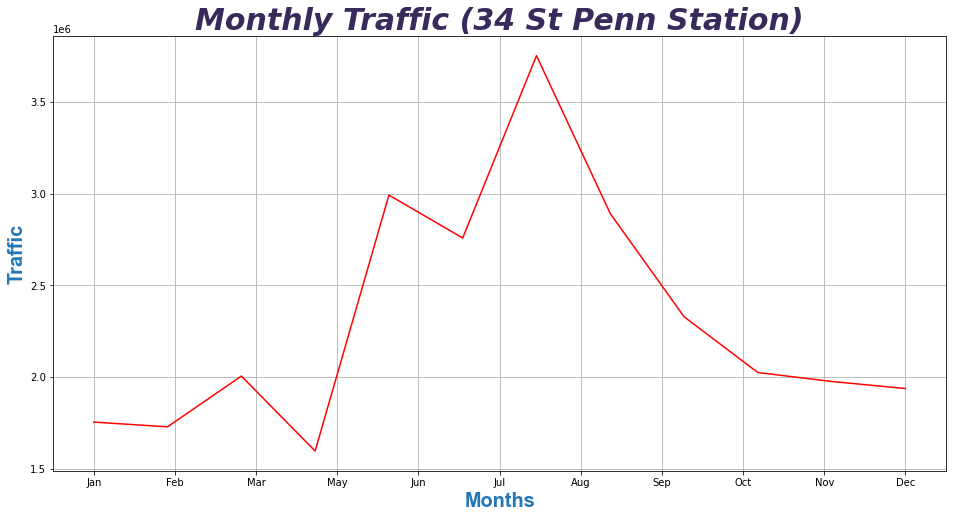

In [48]:
# to calculate the busyiest month, we simply create a list of the stations busyness.
station_34= [1755349, 1729775, 2006130, 1597857, 2991863, 2758147, 3751106, 2891128, 2329262, 2025379, 1976758 ,1938328 ]
months= ['Jan', 'Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = [16,8]) 
plt.plot(station_34, c='r')
plt.grid()
plt.title('Monthly Traffic (34 St Penn Station)',family='cursive',fontsize = 30,loc='center',color='#382b5c', style= 'italic', weight = 'bold');
plt.xlabel('Months', family='Arial', fontsize = 20, weight = 'bold',color="#2478b7")
plt.ylabel('Traffic',family='Arial', fontsize = 20, weight = 'bold',color='#2478b7');
ticks_x = np.linspace(0, 11, 11)
plt.xticks(ticks_x,months);

<BarContainer object of 12 artists>

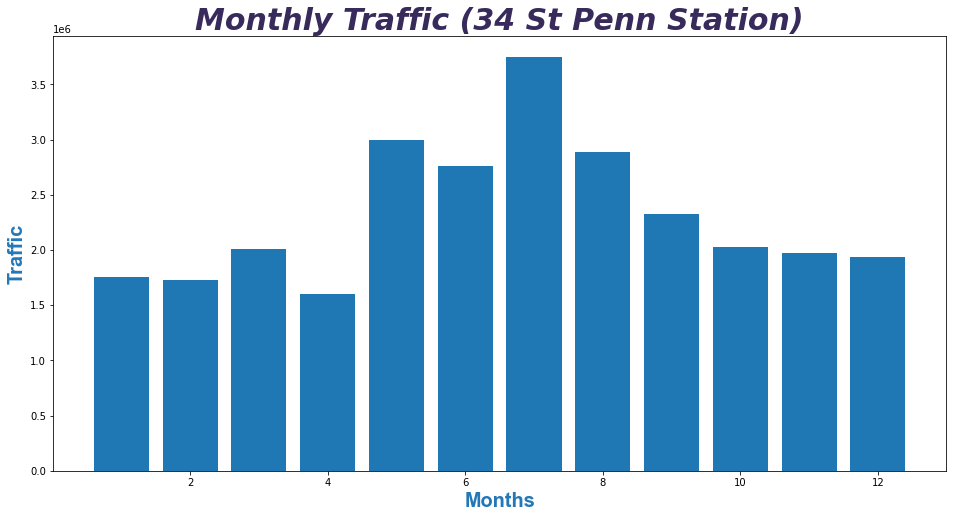

In [50]:
station_34= [1755349, 1729775, 2006130, 1597857, 2991863, 2758147, 3751106, 2891128, 2329262, 2025379, 1976758 ,1938328 ]
months= ['Jan', 'Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = [16,8]) 
plt.title('Monthly Traffic (34 St Penn Station)',family='cursive',fontsize = 30,loc='center',color='#382b5c', style= 'italic', weight = 'bold');
plt.xlabel('Months', family='Arial', fontsize = 20, weight = 'bold',color="#2478b7")
plt.ylabel('Traffic',family='Arial', fontsize = 20, weight = 'bold',color='#2478b7');
ticks_x = np.linspace(0, 11, 11)
plt.bar(np.arange(1, 13), station_34)

# 4. The Busiest Hours:

In [29]:
# From the abovw we can see that the busyist month for 34 St Station is July.
 #We will add the following coluomns 'HOUR'  
jul_df['HOUR'] = jul_df['TIME'].map(time_to_hour)
# then we will add the name of the day but first we need to change the DATE from object to date  
jul_df["DATE"]= pd.to_datetime(jul_df["DATE"])

jul_df['day_of_week'] = jul_df['DATE'].dt.day_name()


In [30]:
jul_df.head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,day_of_week,Week_Number,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,00:00:00,REGULAR,7592792,2595706,0.0,0.0,0.0,Saturday,25,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,04:00:00,REGULAR,7592804,2595713,12.0,7.0,19.0,Saturday,25,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,08:00:00,REGULAR,7592816,2595729,12.0,16.0,28.0,Saturday,25,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,12:00:00,REGULAR,7592870,2595762,54.0,33.0,87.0,Saturday,25,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,16:00:00,REGULAR,7592992,2595791,122.0,29.0,151.0,Saturday,25,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A002,R051,02-03-00,59 ST,NQR456W,BMT,2021-06-28,00:00:00,REGULAR,1437940,5431215,30.0,47.0,77.0,Monday,26,0
96,A002,R051,02-03-00,59 ST,NQR456W,BMT,2021-06-28,04:00:00,REGULAR,1437940,5431220,0.0,5.0,5.0,Monday,26,4
97,A002,R051,02-03-00,59 ST,NQR456W,BMT,2021-06-28,08:00:00,REGULAR,1437941,5431380,1.0,160.0,161.0,Monday,26,8
98,A002,R051,02-03-00,59 ST,NQR456W,BMT,2021-06-28,12:00:00,REGULAR,1437955,5431720,14.0,340.0,354.0,Monday,26,12


In [31]:
# for station 34 we need to create this new dataframe
jul_df['Week_Number'] = jul_df['DATE'].dt.week

jul_df


<ipython-input-31-f65f551c469c>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  jul_df['Week_Number'] = jul_df['DATE'].dt.week


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,day_of_week,Week_Number,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,00:00:00,REGULAR,7592792,2595706,0.0,0.0,0.0,Saturday,25,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,04:00:00,REGULAR,7592804,2595713,12.0,7.0,19.0,Saturday,25,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,08:00:00,REGULAR,7592816,2595729,12.0,16.0,28.0,Saturday,25,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,12:00:00,REGULAR,7592870,2595762,54.0,33.0,87.0,Saturday,25,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,16:00:00,REGULAR,7592992,2595791,122.0,29.0,151.0,Saturday,25,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209458,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-07-30,05:00:00,REGULAR,5554,589,0.0,0.0,0.0,Friday,30,5
209459,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-07-30,09:00:00,REGULAR,5554,589,0.0,0.0,0.0,Friday,30,9
209460,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-07-30,13:00:00,REGULAR,5554,589,0.0,0.0,0.0,Friday,30,13
209461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-07-30,17:00:00,REGULAR,5554,590,0.0,1.0,1.0,Friday,30,17


In [32]:
cleaned_df = jul_df[jul_df['BUSYNESS'] >= 100]
cleaned_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,day_of_week,Week_Number,HOUR
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,16:00:00,REGULAR,7592992,2595791,122.000000,29.000000,151.000000,Saturday,25,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,20:00:00,REGULAR,7593116,2595809,124.000000,18.000000,142.000000,Saturday,25,20
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-27,16:00:00,REGULAR,7593330,2595903,103.000000,23.000000,126.000000,Sunday,25,16
11,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-27,20:00:00,REGULAR,7593427,2595922,97.000000,19.000000,116.000000,Sunday,25,20
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-28,12:00:00,REGULAR,7593559,2596095,61.000000,116.000000,177.000000,Monday,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209293,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-07-30,17:00:00,REGULAR,3805429,52034,287.000000,4.000000,291.000000,Friday,30,17
209294,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-07-30,21:00:00,REGULAR,3805726,52041,297.000000,7.000000,304.000000,Friday,30,21
209295,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,RIT,2021-07-24,01:00:00,REGULAR,755922,30900,62.926585,83.954739,146.881324,Saturday,29,1
209337,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,2021-07-24,01:00:00,REGULAR,3136829,397659,68.253719,67.221395,135.475114,Saturday,29,1


In [33]:
sat_df= cleaned_df[cleaned_df['day_of_week']=='Saturday'] 
sat_week25_df= sat_df[sat_df['Week_Number']== 25]
sat_week25_df


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,day_of_week,Week_Number,HOUR
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,16:00:00,REGULAR,7592992,2595791,122.000000,29.000000,151.000000,Saturday,25,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,20:00:00,REGULAR,7593116,2595809,124.000000,18.000000,142.000000,Saturday,25,20
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,2021-06-26,00:00:00,REGULAR,6721656,1531910,49.802190,73.052828,122.855018,Saturday,25,0
46,A002,R051,02-00-01,59 ST,NQR456W,BMT,2021-06-26,16:00:00,REGULAR,6721793,1531966,83.000000,21.000000,104.000000,Saturday,25,16
47,A002,R051,02-00-01,59 ST,NQR456W,BMT,2021-06-26,20:00:00,REGULAR,6721903,1531980,110.000000,14.000000,124.000000,Saturday,25,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209624,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-26,17:00:00,REGULAR,3771754,51304,451.000000,8.000000,459.000000,Saturday,25,17
209625,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-26,21:00:00,REGULAR,3772203,51312,449.000000,8.000000,457.000000,Saturday,25,21
209662,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,RIT,2021-06-26,01:00:00,REGULAR,753065,30764,62.926585,83.954739,146.881324,Saturday,25,1
209704,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,2021-06-26,01:00:00,REGULAR,3133585,397466,68.253719,67.221395,135.475114,Saturday,25,1


<AxesSubplot:xlabel='HOUR', ylabel='BUSYNESS'>

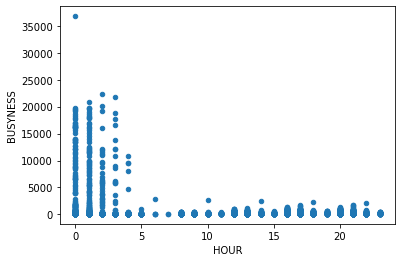

In [34]:
sat_week25_df.plot.scatter(x='HOUR', y='BUSYNESS')

In [35]:
mon_df= cleaned_df[cleaned_df['day_of_week']=='Monday'] 
mon_week25_df= mon_df[mon_df['Week_Number']== 26]
mon_week25_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,day_of_week,Week_Number,HOUR
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-28,12:00:00,REGULAR,7593559,2596095,61.0,116.0,177.0,Monday,26,12
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-28,16:00:00,REGULAR,7593703,2596124,144.0,29.0,173.0,Monday,26,16
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-28,20:00:00,REGULAR,7593979,2596145,276.0,21.0,297.0,Monday,26,20
57,A002,R051,02-00-01,59 ST,NQR456W,BMT,2021-06-28,12:00:00,REGULAR,6722225,1532154,66.0,74.0,140.0,Monday,26,12
58,A002,R051,02-00-01,59 ST,NQR456W,BMT,2021-06-28,16:00:00,REGULAR,6722349,1532171,124.0,17.0,141.0,Monday,26,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209595,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,2021-06-28,21:00:00,REGULAR,862171,21141,210.0,17.0,227.0,Monday,26,21
209634,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-28,09:00:00,REGULAR,3773684,51357,193.0,0.0,193.0,Monday,26,9
209635,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-28,13:00:00,REGULAR,3773919,51359,235.0,2.0,237.0,Monday,26,13
209636,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-28,17:00:00,REGULAR,3774164,51365,245.0,6.0,251.0,Monday,26,17


<AxesSubplot:xlabel='HOUR', ylabel='BUSYNESS'>

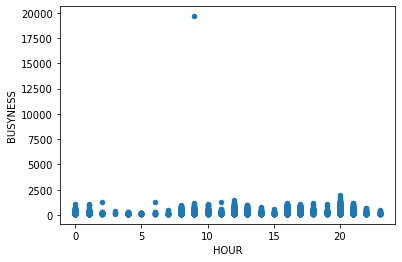

In [36]:
mon_week25_df.plot.scatter(x='HOUR', y='BUSYNESS')

In [37]:
tus_df= cleaned_df[cleaned_df['day_of_week']=='Tuesday'] 
tus_week25_df= tus_df[tus_df['Week_Number']== 26]
tus_week25_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,day_of_week,Week_Number,HOUR
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-29,12:00:00,REGULAR,7594135,2596340,56.0,123.0,179.0,Tuesday,26,12
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-29,16:00:00,REGULAR,7594259,2596383,124.0,43.0,167.0,Tuesday,26,16
23,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-29,20:00:00,REGULAR,7594528,2596417,269.0,34.0,303.0,Tuesday,26,20
63,A002,R051,02-00-01,59 ST,NQR456W,BMT,2021-06-29,16:00:00,REGULAR,6722787,1532329,141.0,99.0,240.0,Tuesday,26,16
64,A002,R051,02-00-01,59 ST,NQR456W,BMT,2021-06-29,20:00:00,REGULAR,6722963,1532355,176.0,26.0,202.0,Tuesday,26,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209601,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,2021-06-29,21:00:00,REGULAR,862930,21153,180.0,2.0,182.0,Tuesday,26,21
209640,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-29,09:00:00,REGULAR,3774635,51381,201.0,1.0,202.0,Tuesday,26,9
209641,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-29,13:00:00,REGULAR,3774862,51384,227.0,3.0,230.0,Tuesday,26,13
209642,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,2021-06-29,17:00:00,REGULAR,3775045,51387,183.0,3.0,186.0,Tuesday,26,17


<AxesSubplot:xlabel='HOUR', ylabel='BUSYNESS'>

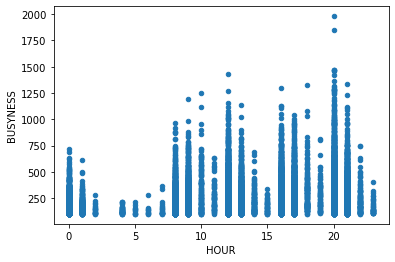

In [38]:
tus_week25_df.plot.scatter(x='HOUR', y='BUSYNESS')

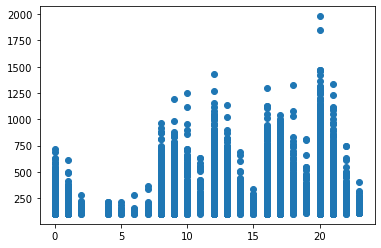

In [39]:
new_x = tus_week25_df['HOUR']
new_y = tus_week25_df['BUSYNESS']
plt.scatter(new_x,new_y);

<ipython-input-59-46ff1fabc467>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


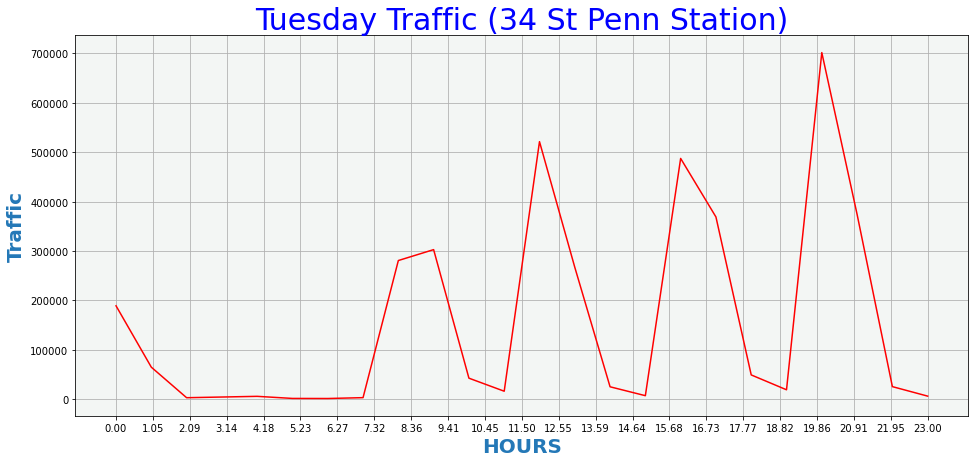

In [59]:
tus_g= tus_week25_df.groupby(['HOUR'])['BUSYNESS'].sum()

plt.figure(figsize = [16,7]) 
plt.plot(tus_g, c='r')
plt.grid()
plt.title('Tuesday Traffic (34 St Penn Station)',family='cursive',fontsize = 30,loc='center',color='b');
plt.xlabel('HOURS', fontsize = 20, weight = 'bold',color="#2478b7")
plt.ylabel('Traffic',fontsize = 20, weight = 'bold',color='#2478b7');
ticks_x = np.linspace(0, 23, 23)
ax = plt.axes()
ax.set_facecolor("#f3f6f4")
plt.xticks(ticks_x);


# 5. Findings and Conclusions:


In [159]:
from sqlalchemy import create_engine

In [161]:
engine = create_engine('sqlite://',echo=False)
jan_df.to_sql("mydf", con=engine)

In [164]:
x= pd.read_sql('SELECT * FROM mydf WHERE HOUR >12;', engine)
x

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,BUSYNESS,HOUR,MONTH,YEAR
0,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,79.0,31.0,110.0,15,12,2020
1,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,157.0,22.0,179.0,19,12,2020
2,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,85.0,15.0,100.0,23,12,2020
3,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,15:00:00,REGULAR,7508955,2557778,70.0,35.0,105.0,15,12,2020
4,10,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,19:00:00,REGULAR,7509073,2557801,118.0,23.0,141.0,19,12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363294,208832,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/20/2021,20:00:00,REGULAR,5554,544,0.0,0.0,0.0,20,1,2021
363295,208837,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/21/2021,16:00:00,REGULAR,5554,544,0.0,0.0,0.0,16,1,2021
363296,208838,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/21/2021,20:00:00,REGULAR,5554,544,0.0,0.0,0.0,20,1,2021
363297,208843,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/22/2021,16:00:00,REGULAR,5554,544,0.0,0.0,0.0,16,1,2021
